In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
# import osmnx as ox
# import folium

# # define the area of interest
# place = "United States"
# tags = {"power": True}

# # download the OSM data for the area
# graph = ox.graph_from_place(place, network_type="all", custom_filter=tags)

# # plot the graph on an interactive map
# m = folium.Map(location=[graph.nodes[list(graph.nodes())[0]]['y'], graph.nodes[list(graph.nodes())[0]]['x']], zoom_start=10, tiles="Stamen Terrain")
# folium.GeoJson(ox.graph_to_gdfs(graph, nodes=False, fill_edge_geometry=True)).add_to(m)
# m

# Doing it from local file
import osmnx as ox
import geopandas as gpd
import folium

# Define the path to the OSMnx BZ2 file
# path_to_file = "/Users/ryanmc/Documents/NSF_CHESS/data/us-northeast-latest.osm.bz2"
path_to_file = "/Users/ryanmc/Documents/NSF_CHESS/data/us-pacific-latest.osm"

# Read the OSMnx BZ2 file and convert to a GeoDataFrame
power_gdf = ox.load_graphml(path_to_file)#, node_type=None, edge_attrs=None)
power_gdf = ox.graph_to_gdfs(power_gdf, nodes=False, edges=True, node_geometry=False, fill_edge_geometry=True)

# Create a Folium map centered at the mean latitude and longitude of the power grid
center_lat = power_gdf["geometry"].mean().y
center_lon = power_gdf["geometry"].mean().x
map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add the power grid as a GeoJSON layer to the Folium map
geojson = gpd.GeoSeries(power_gdf["geometry"]).to_json()
folium.GeoJson(geojson).add_to(map)

# Display the Folium map
map


OverflowError: size does not fit in an int

In [5]:
import osmnx as ox
import folium

# specify the path to your OpenStreetMap data file
osm_file = "/Users/ryanmc/Documents/NSF_CHESS/data/us-pacific-latest.osm"

# extract power grid network data from the OpenStreetMap file
graph = ox.graph_from_xml(osm_file)

# create a folium map centered on the location of the power grid network
location = ox.utils_geo.get_largest_component(graph).unary_union.centroid
m = folium.Map(location=[location.y, location.x], zoom_start=10)

# add the power grid network to the folium map
folium.features.GeoJson(ox.utils_geo.make_folium_polyline(graph, edge_color="#FF0000")).add_to(m)

# display the folium map
m


KeyboardInterrupt: 

In [25]:
# define the bounding box for the power grid in the US
# north, south, east, west = 49.3457868, 24.7433195, -66.9513812, -124.7844079 #US
north, south, east, west = 49.3457868, 45, -66.9513812, -85.0 # roughly NE US
bbox = (north, south, east, west)



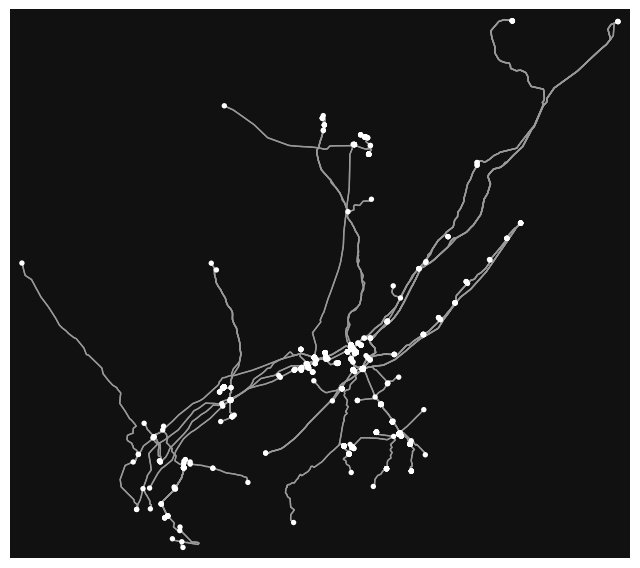

In [26]:
# download the power grid data from OpenStreetMap
power_filter = ('["power"="line"]'
                '["voltage"]')
#                 ';'
#                 '(._;>;);'
#                 'out;')
G = ox.graph_from_bbox(north, south, east, west, network_type='none', custom_filter=power_filter)

# plot the network
fig, ax = ox.plot_graph(G)
plt.show()

In [15]:
G

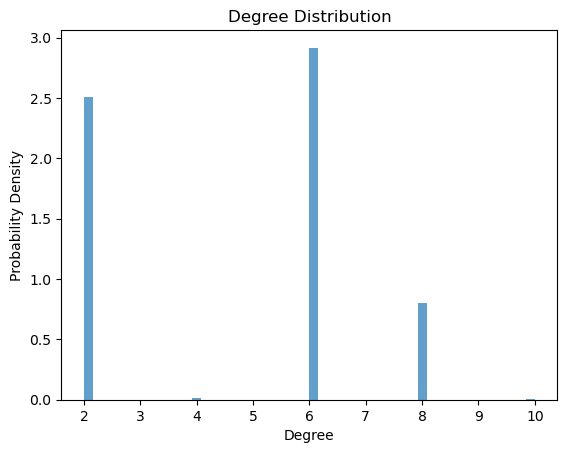

In [16]:
# calculate degree distribution and betweenness centrality
degrees = dict(G.degree())
degree_sequence = sorted([d for n, d in degrees.items()], reverse=True)
num_nodes = len(G.nodes)
bc = nx.betweenness_centrality(G)

# plot degree distribution
plt.hist(degree_sequence, bins=50, density=True, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution')
plt.show()

Power-law exponent: 0.227


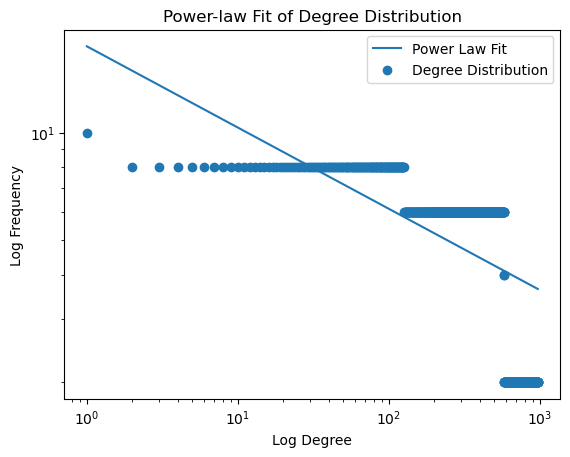

In [17]:
# fit the degree distribution
def power_law(x, a, b):
    return a*np.power(x, -b)

popt, pcov = curve_fit(power_law, np.arange(1, len(degree_sequence) + 1), degree_sequence)
print("Power-law exponent: {:.3f}".format(popt[1]))
x_fit = np.linspace(1, num_nodes, num_nodes)
y_fit = power_law(x_fit, *popt)

# plot the fitted degree distribution
plt.loglog(x_fit, y_fit, label='Power Law Fit')
plt.scatter(np.arange(1, num_nodes+1), degree_sequence, label='Degree Distribution')
plt.xlabel('Log Degree')
plt.ylabel('Log Frequency')
plt.title('Power-law Fit of Degree Distribution')
plt.legend()
plt.show()

In [19]:
# calculate betweenness centrality and plot on the graph
bc_values = [bc.get(node) for node in G.nodes()]
nc = nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.cool, node_color=bc_values, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.colorbar(nc)
plt.title('Betweenness Centrality')
plt.axis('off')
plt.show()


NameError: name 'pos' is not defined